In [1]:
import sys
import os
from pathlib import Path

project_root = Path(os.getcwd()).parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

In [2]:
from summarization import FlanT5Trainer

/Users/komangwikananda/miniconda3/envs/sona-ai/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/komangwikananda/miniconda3/envs/sona-ai/lib/python3.12/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/komangwikananda/miniconda3/envs/sona-ai/lib/python3.12/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <367D4265-B20F-34BD-94EB-4F3EE47C385B> /Users/komangwikananda/miniconda3/envs/sona-ai/lib/python3.12/site-packages/torchvision/image.so
  Reason: tried: '/Users/komangwikananda/miniconda3/envs/sona-ai/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/komangwikananda/miniconda3/envs/sona-ai/lib/python3.12/site-packages/torchvision/../../../libj

CUDA available: False


In [3]:
training_args = {
    # ===== TRAINING =====
    "num_train_epochs": 5,
    "learning_rate": 2e-5,
    "per_device_train_batch_size": 4,
    "per_device_eval_batch_size": 4,
    "weight_decay": 0.01,
    "gradient_accumulation_steps": 4,

    # ===== EVALUATION / LOGGING / SAVING =====
    "evaluation_strategy": "epoch",
    "logging_strategy": "epoch",
    "save_strategy": "epoch",

    # ===== SEQ2SEQ SPECIFIC =====
    "predict_with_generate": True,
    "generation_max_length": 256,
    "generation_num_beams": 4,

    # ===== PERFORMANCE =====
    "fp16": False,
    "gradient_checkpointing": True,

    # ===== MODEL SELECTION =====
    "load_best_model_at_end": True,
    "metric_for_best_model": "rougeL",
    "greater_is_better": True,

    # ===== MISC =====
    "report_to": "none",

    # REQUIRED
    "output_dir": "../outputs/summarization",
}


trainer = FlanT5Trainer(config="flan-t5")
trainer.prepare_data_and_trainer(
    training_args_dict=training_args,
    train_size=100,
    val_size=10,
    test_size=10
)

Applying new LoRA configuration...
trainable params: 9,437,184 || all params: 792,587,264 || trainable%: 1.1907
Preparing dataset...
Loading processed dataset from disk...
Merging custom training arguments...


/Users/komangwikananda/miniconda3/envs/sona-ai/lib/python3.12/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/Users/komangwikananda/Documents/Work/Sona AI/sona-ai/summarization/FlanT5Trainer.py:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  return Seq2SeqTrainer(


Starting LoRA fine-tuning...
Using device: mps
Training size: 100 | Val size: 10 | Test size: 10


`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,3.705100,4.026310,0.110849,0.036198,0.076937,0.076450
2,3.612500,4.021627,0.110849,0.036198,0.076937,0.076450
3,3.627600,4.018538,0.110849,0.036198,0.076937,0.076450
4,4.060700,4.017012,0.110849,0.036198,0.076937,0.076450


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Saving LoRA adapters to /Users/komangwikananda/Documents/Work/Sona AI/sona-ai/cp/flan-t5-small-mediasum
Training logs saved to /Users/komangwikananda/Documents/Work/Sona AI/sona-ai/cp/flan-t5-small-mediasum/training_logs.json
Training plots saved to /Users/komangwikananda/Documents/Work/Sona AI/sona-ai/cp/flan-t5-small-mediasum


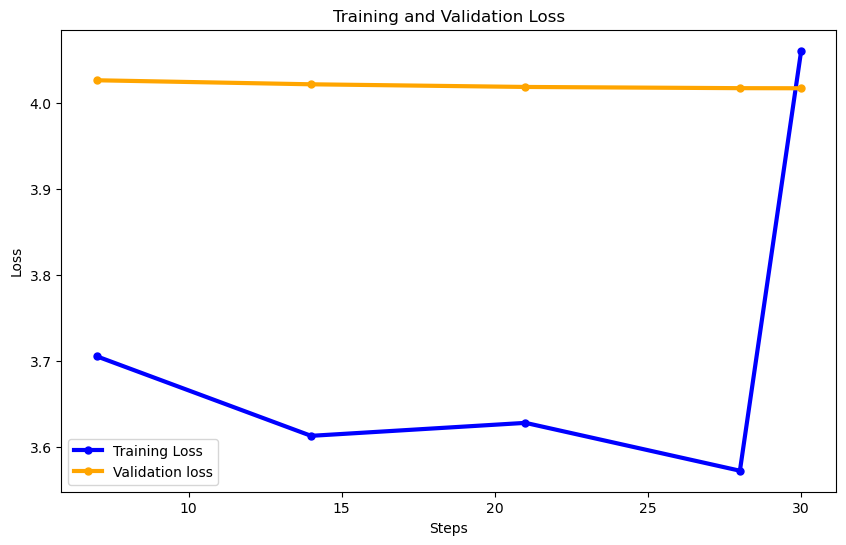

In [4]:
trainer.train()

In [5]:
trainer.test()

Using device: mps
Testing model on 10 samples...
Evaluating LoRA model...


Evaluating Base model (no LoRA)...



--- Sample Predictions Comparison ---
Target: Interview With Texas Congresswoman Sheila Jackson Lee; Terror Attack in Egypt Kills Hundreds; Flynn Lawyers Stop Sharing Info with Trump's Lawyers U.S. Intelligence Fears Terror Attack Over Holidays; CNN Exposes Modern Day Slave Trade.
Base  : Hundreds of people killed in a coordinated attack on a mosque. Bomb blasts sent worshipers fleeing, only for them to be slaughtered by waiting gunmen. Who is behind this horrifying massacre? Cooperating witness. Lawyers for former National Security Adviser Michael Flynn stop sharing information about the Russia investigation with President Trump's legal team. Does it mean Flynn is now cooperating with the special prosecutor and trying to cut a deal? Heightened alert. Frayed nerves in London, but no sign of terror after reports of gunshots in a crowded shopping district. But European and U.S. intelligence fear ISIS or al Qaeda may be plotting to attack over the holidays. Why are terrorists more desper

{'metrics': {'lora_metrics': {'test_loss': 3.3811299800872803,
   'test_rouge1': 0.18093629932759736,
   'test_rouge2': 0.06084484998818805,
   'test_rougeL': 0.1260642358014989,
   'test_rougeLsum': 0.12579214539883743,
   'test_runtime': 37.9479,
   'test_samples_per_second': 0.264,
   'test_steps_per_second': 0.079},
  'base_metrics': {'test_loss': 3.390411138534546,
   'test_rouge1': 0.15592171677667882,
   'test_rouge2': 0.05206063536298735,
   'test_rougeL': 0.10634035250375298,
   'test_rougeLsum': 0.10643166899875728,
   'test_runtime': 33.8291,
   'test_samples_per_second': 0.296,
   'test_steps_per_second': 0.089}},
 'lora_predictions': ["Hundreds of people killed in a coordinated attack on a mosque. Bomb blasts sent worshipers fleeing, only for them to be slaughtered by waiting gunmen. Who is behind this horrifying massacre? Cooperating witness. Lawyers for former National Security Adviser Michael Flynn stop sharing information about the Russia investigation with President T

# Inference

In [2]:
from summarization import FlanT5Inferencer

c:\Users\nanda\miniconda3\envs\sona-ai\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CUDA available: True
CUDA device: NVIDIA GeForce RTX 3060 Laptop GPU


In [3]:
text = f"Nik: I don't think we should apply this change. \nRen: I agree. The helmet make the side ears looks too small. The face proportion looks weird. \nNik: But, I like the helmet tho. It looks kinda nice. \nRen: Should I redraw and adjust this? So we can keep it. \nNik: Yeah, I really think wearing a helmet will make this character looks awesome. It is just this helmet is not suitable for him. But, the design is cool tho. Maybe for the other character. \nRen: Yeah, sure. I will redraw it, then I will comeback to you later. \nNik: Ok, sure."
print(text)

Nik: I don't think we should apply this change. 
Ren: I agree. The helmet make the side ears looks too small. The face proportion looks weird. 
Nik: But, I like the helmet tho. It looks kinda nice. 
Ren: Should I redraw and adjust this? So we can keep it. 
Nik: Yeah, I really think wearing a helmet will make this character looks awesome. It is just this helmet is not suitable for him. But, the design is cool tho. Maybe for the other character. 
Ren: Yeah, sure. I will redraw it, then I will comeback to you later. 
Nik: Ok, sure.


In [5]:
inferencer = FlanT5Inferencer(
    config_name="flan-t5",
    use_pretrained=True,
    device="cpu",
    max_new_tokens=256,
    num_beams=4,
)
summary = inferencer.generate(text)
print(summary)

Using pretrained LoRA adapters from d:\Jobs\sona-ai\cp\flan-t5-small-mediasum...
Nik and Ren will redraw the helmet.
